# 1- Importing Libraries

In [1]:
import sys
!{sys.executable} -m pip install nltk


In [2]:
! pip install pandas numpy seaborn matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pandas.errors import SettingWithCopyWarning 
import warnings
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm
from nltk.tokenize import word_tokenize,sent_tokenize
import pickle
nltk.download('punkt_tab')
nltk.download("stopwords")

stem = PorterStemmer()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prabhsandhu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prabhsandhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2- Importing/Loading Dataset

In [4]:
df_movies = pd.read_csv("/Users/prabhsandhu/Movie Recommender System/Artifacts/Datasets/tmdb_5000_credits.csv")
df_credits = pd.read_csv("/Users/prabhsandhu/Movie Recommender System/Artifacts/Datasets/tmdb_5000_movies.csv")


In [5]:
df_movies.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df_credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# 3- Merging or Joining Dataset(Using Inner join to join dataser on Foreign Key(title)

In [7]:
movies = pd.merge(df_movies,df_credits,how="inner",on="title")
movies

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4805,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5

# 4- Understanding/Exploring the Dataset

In [8]:
movies.shape

(4809, 23)

In [9]:
movies.ndim

2

In [10]:
movies.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4809 non-null   int64  
 1   title                 4809 non-null   object 
 2   cast                  4809 non-null   object 
 3   crew                  4809 non-null   object 
 4   budget                4809 non-null   int64  
 5   genres                4809 non-null   object 
 6   homepage              1713 non-null   object 
 7   id                    4809 non-null   int64  
 8   keywords              4809 non-null   object 
 9   original_language     4809 non-null   object 
 10  original_title        4809 non-null   object 
 11  overview              4806 non-null   object 
 12  popularity            4809 non-null   float64
 13  production_companies  4809 non-null   object 
 14  production_countries  4809 non-null   object 
 15  release_date         

In [12]:
movies.dtypes

movie_id                  int64
title                    object
cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
vote_average            float64
vote_count                int64
dtype: object

summary = movies.describe()
summary

# 5- Preprocessing the Dataset

# (A) - Removing Unnecassary Columns

In [13]:
movies
df =  movies.drop(["budget","spoken_languages","popularity","status","tagline","revenue","original_title","vote_average","vote_count","id"],axis=1)

In [14]:
df

,movie_id,title,cast,crew,genres,homepage,keywords,original_language,overview,production_companies,production_countries,release_date,runtime
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.0
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.0
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.0
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi just wants to play his guitar and ...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,81.0
4805,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,A newlywed couple's honeymoon is upended by th...,[],[],2011-12-26,85.0
4806,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"""Signed, Sealed, Delivered"" introduces a dedic...","[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,120.0
4807,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e1

# (B) - Removing Null Values

In [15]:
df.isnull().sum()

movie_id                   0
title                      0
cast                       0
crew                       0
genres                     0
homepage                3096
keywords                   0
original_language          0
overview                   3
production_companies       0
production_countries       0
release_date               1
runtime                    2
dtype: int64

In [16]:
df["runtime"].dropna(axis=0,inplace=True)
df.isnull().sum()

movie_id                   0
title                      0
cast                       0
crew                       0
genres                     0
homepage                3096
keywords                   0
original_language          0
overview                   3
production_companies       0
production_countries       0
release_date               1
runtime                    2
dtype: int64

In [17]:
df["homepage"].fillna("Not Available",inplace=True)
df["overview"].fillna("Not Available",inplace=True)
df.isnull().sum()

/var/folders/02/bqdg6sy929v6ddf025k87q7w0000gn/T/ipykernel_33150/850525403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["homepage"].fillna("Not Available",inplace=True)
/var/folders/02/bqdg6sy929v6ddf025k87q7w0000gn/T/ipykernel_33150/850525403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

movie_id                0
title                   0
cast                    0
crew                    0
genres                  0
homepage                0
keywords                0
original_language       0
overview                0
production_companies    0
production_countries    0
release_date            1
runtime                 2
dtype: int64

In [18]:
df = df.dropna()
df.isnull().sum()

movie_id                0
title                   0
cast                    0
crew                    0
genres                  0
homepage                0
keywords                0
original_language       0
overview                0
production_companies    0
production_countries    0
release_date            0
runtime                 0
dtype: int64

# (C) -  Checking/Removing Duplicate Values

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# (D) - Checking for Outliers in Numerical Values

<Axes: >

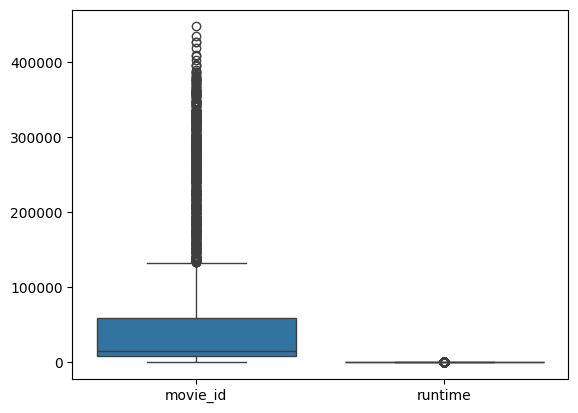

In [20]:
sns.boxplot(df)
# The outlier with movie ID is fine since Movie is is discrete value not cnontinous value

# (E) -  Preprocessing Columns and Labels

In [21]:
# 1- Preprocessing Keywords,Genres, Production Countries, Cast for Fetching Names

In [22]:
import ast

def process(item):
    lis = []
    conversion = ast.literal_eval(item)
    for i in conversion:
        lis.append(i["name"]) 
    
    return lis


In [23]:
df["keywords"] = df["keywords"].apply(process)

In [24]:
df["genres"] = df["genres"].apply(process)

In [25]:
df["production_countries"] = df["production_countries"] .apply(process)

In [26]:
df["cast"] = df["cast"].apply(process)

In [27]:
df.head(1)

,movie_id,title,cast,crew,genres,homepage,keywords,original_language,overview,production_companies,production_countries,release_date,runtime
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[United States of America, United Kingdom]",2009-12-10,162.0


In [28]:
# 2 - Processing Crew Column for Fetching Names of Director

In [29]:
import ast
def process1(item):
    lis = []
    conversion = ast.literal_eval(item)
    for i in conversion:
        if i["department"]=="Directing":
         lis.append(i["name"]) 
         return lis



In [30]:
df["Director"] = df["crew"].apply(process1)
df.drop("crew",axis=1,inplace=True)

In [31]:
df.head(1)

,movie_id,title,cast,genres,homepage,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,Director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[United States of America, United Kingdom]",2009-12-10,162.0,[James Cameron]


In [32]:
# 2 - Processing production_companies Column for Fetching Production Companies Names

In [33]:
import ast

def process(item):
    lis = []
    conversion = ast.literal_eval(item)
    for i in conversion:
        lis.append(i["name"]) 
    
    return lis

In [34]:
df["production_companies"] = df["production_companies"].apply(process)
df.head(1)

,movie_id,title,cast,genres,homepage,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,Director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,[James Cameron]


In [35]:
df.head(1)

,movie_id,title,cast,genres,homepage,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,Director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,[James Cameron]


In [36]:
df["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [37]:
df.iloc[4800:,3:4]

,genres
4803,"[Foreign, Thriller]"
4804,"[Action, Crime, Thriller]"
4805,"[Comedy, Romance]"
4806,"[Comedy, Drama, Romance, TV Movie]"
4807,[]
4808,[Documentary]


In [38]:
df["genres"] = df["genres"].apply(lambda x: [i.strip() for i in x])
df.head(1)

,movie_id,title,cast,genres,homepage,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,Director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,[James Cameron]


In [39]:
# Coverting string into List
df["overview"] = df["overview"] .apply(lambda x: x.split())
df["overview"]

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

# 6 -  Preprocessing Text using NLP(Natural Language Processig)


In [40]:
# 1- Converting List into Strings


In [41]:
def conversion(item):
     return item.apply(lambda x: " ".join(x) if isinstance(x,list) else "")
keywords = conversion(df["keywords"])
cast = conversion(df["cast"])
genres =conversion(df["genres"])
overview =conversion(df["overview"])
production_companies = conversion(df["production_companies"])
Director = conversion(df["Director"])

In [42]:
tags = (
    df['title'] + " " +
    keywords + " " +
    cast + " " +
    df['original_language'] + " " +
    genres + " " +
    overview + " " +
    production_companies + " " +
    Director
)

tags[0]

'Avatar culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Giovanni Ribisi Joel David Moore CCH Pounder Wes Studi Laz Alonso Dileep Rao Matt Gerald Sean Anthony Moran Jason Whyte Scott Lawrence Kelly Kilgour James Patrick Pitt Sean Patrick Murphy Peter Dillon Kevin Dorman Kelson Henderson David Van Horn Jacob Tomuri Michael Blain-Rozgay Jon Curry Luke Hawker Woody Schultz Peter Mensah Sonia Yee Jahnel Curfman Ilram Choi Kyla Warren Lisa Roumain Debra Wilson Chris Mala Taylor Kibby Jodie Landau Julie Lamm Cullen B. Madden Joseph Brady Madden Frankie Torres Austin Wilson Sara Wilson Tamica Washington-Miller Lucy Briant Nathan Meister Gerry Blair Matthew Chamberlain Paul Yates Wray Wilson James Gaylyn Melvin Leno Clark III Carvon Futrell Brandon Jelkes Micah Moch Hanniyah

In [43]:
import re

# 7- Text Preprocessing(NlP)

In [44]:
processed_text = []
for i in tags:
    words = i.lower()
    words = re.sub(r'[^a-zA-Z]', ' ', words)
    words = word_tokenize(words)
    # remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    words = [stem.stem(word) for word in words]
    words = [word for word in words if len(word) >= 2]
    new_tags = " ".join(words)
    processed_text.append(new_tags)

# 8-Encoding the Text

In [45]:
vectoriser = CountVectorizer(max_features=5000, stop_words="english")
encoding = vectoriser.fit_transform(processed_text)
vectoriser.get_feature_names_out()# print first vector

array(['aaron', 'abandon', 'abbi', ..., 'zoo', 'zooey', 'zucker'],
      shape=(5000,), dtype=object)

# 9- Training Model on Cosine Similarity Angle

In [46]:
sim = cosine_similarity(encoding)
print(sim)

[[1.         0.11498051 0.08081288 ... 0.06249397 0.0339178  0.04597707]
 [0.11498051 1.         0.08906956 ... 0.06818326 0.03568396 0.03685423]
 [0.08081288 0.08906956 1.         ... 0.0488999  0.05971453 0.00925094]
 ...
 [0.06249397 0.06818326 0.0488999  ... 1.         0.07183285 0.06676979]
 [0.0339178  0.03568396 0.05971453 ... 0.07183285 1.         0.04076825]
 [0.04597707 0.03685423 0.00925094 ... 0.06676979 0.04076825 1.        ]]


# 10- Testing Model

In [47]:
import numpy as np

def recommend(movie_title):
    # find index of the movie
    movie_index = df[df['title'].str.lower() == movie_title.lower()].index[0]
    
    distances = sim[movie_index]
    
    similar_movies = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)
    
    print(f"\n🎬 Movies similar to '{movie_title}':\n")
    for i in similar_movies[1:6]:  # skip the first one (itself)
        print(df.iloc[i[0]].title)

recommend('Avatar')



🎬 Movies similar to 'Avatar':

Aliens
Star Trek Into Darkness
Aliens vs Predator: Requiem
Armageddon
Independence Day


# 11 - Saving a Model 

In [48]:
pickle.dump(sim,open("sim.pkl","wb"))

In [49]:
pickle.dump(df,open('data.pkl','wb'))